<a href="https://colab.research.google.com/github/ankurkaiser/Car-Dekho-Regression/blob/main/Car_Dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO.csv


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics

In [4]:
car= pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [5]:
car.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


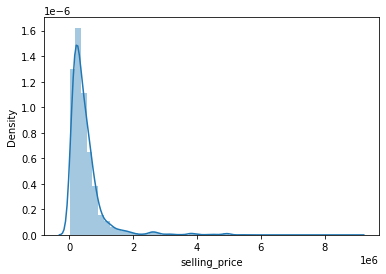

In [6]:
sns.distplot(car['selling_price'])

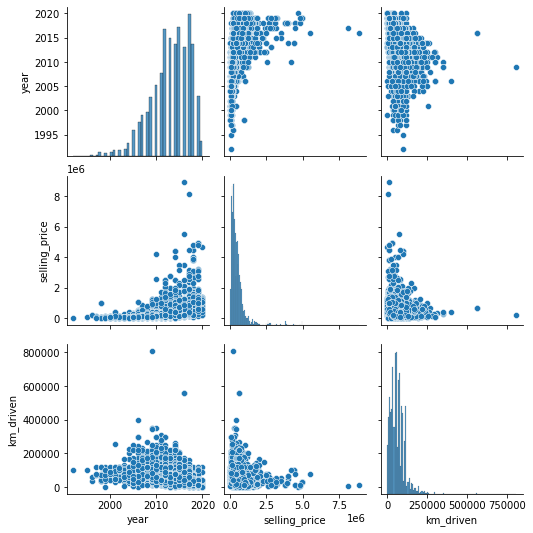

In [7]:
sns.pairplot(car)

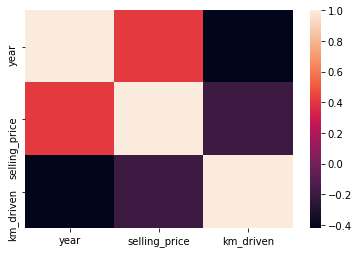

In [8]:
sns.heatmap(car.corr())

In [9]:

car.owner.replace(regex={"First Owner":"0","Second Owner":"1","Third Owner":"3","Fourth & Above Owner":"4","Test Drive Car":"5"},inplace=True)
car.transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
car.fuel.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2","LPG":"3","Electric":"4"},inplace=True)
car.seller_type.replace(regex={"Individual":"0","Dealer":"1","Trustmark Dealer":"3"},inplace=True)
car['onwer']=car['owner'].astype(float)



In [10]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,onwer
0,Maruti 800 AC,2007,60000,70000,0,0,0,0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0,0.0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1,1.0


In [11]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'onwer'],
      dtype='object')

In [12]:
car.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
onwer            0
dtype: int64

In [15]:
car.drop(('seller_type'),axis=1,inplace=True)
car.drop(('name'),axis=1,inplace=True)

In [16]:
car.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner',
       'onwer'],
      dtype='object')

In [17]:
X=car[['year','km_driven', 'fuel','transmission', 'owner']]
y= car['selling_price']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
standardscaled= StandardScaler()
X_train=standardscaled.fit_transform(X_train)
X_test=standardscaled.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


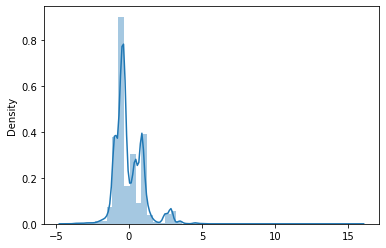

In [24]:
sns.distplot(X_train)

In [25]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,7))}]
hyper_params


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [26]:
predictions = model_cv.predict(X_test)

In [27]:
predictions

array([797068.26690736, 547250.96787952, 466096.37683055, ...,
       186196.63540694, 457806.78004967, 115594.09429861])

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R_2=r2_score(y_test,predictions)
print(R_2)

MAE: 235920.9143581721
MSE: 196960130105.84265
RMSE: 443801.9041259767
0.4370705149355998


In [31]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,X_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(X_train,y_train)
    predicts=algorithm.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,X_train,y_train,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())

    test_index=y_test.reset_index()["selling_price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

r_2 score : 0.4370705149355998 

CV scores: [0.48218254 0.32949726 0.41730109 0.4148803  0.50256095] 

CV scores mean: 0.429284427965473


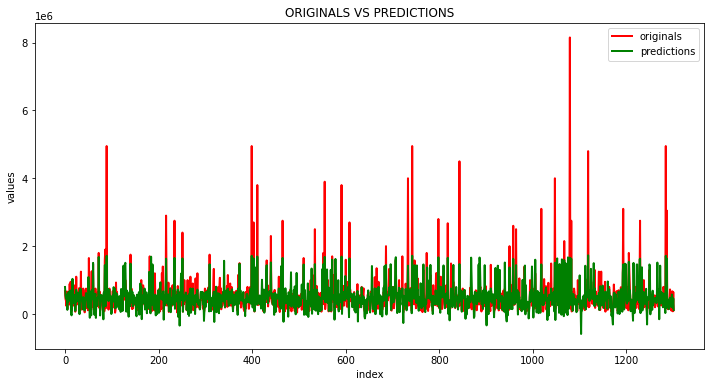

In [32]:
model(lm,X_train,X_test,X_test,y_test)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

r_2 score : 0.4365483963425665 

CV scores: [0.48242354 0.32988485 0.41735792 0.40994152 0.50136876] 

CV scores mean: 0.4281953196385569


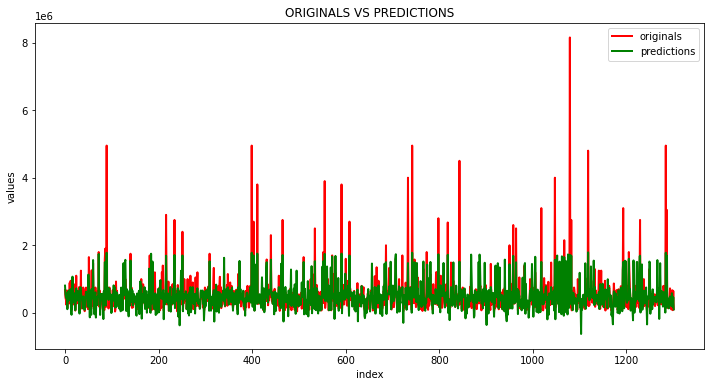

In [33]:
from sklearn.linear_model import SGDRegressor

SGD=SGDRegressor()
model(SGD,X_train,X_test,y_train,y_test)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

r_2 score : 0.4370172535556388 

CV scores: [0.48203815 0.32955524 0.41735012 0.41543479 0.50217263] 

CV scores mean: 0.4293101853238873


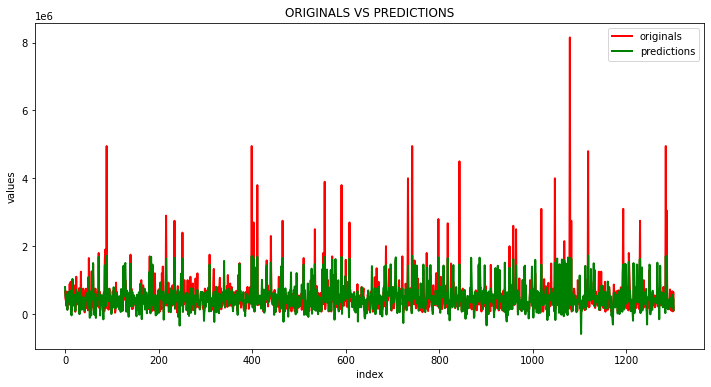

In [34]:
from sklearn.linear_model import BayesianRidge
BR =BayesianRidge()

BR.fit(X_train,y_train)
model(BR,X_train,X_test,y_train,y_test)

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.42931600540260756
1000.0


Lasso(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

r_2 score : 0.4097394935222807 

CV scores: [0.44547309 0.31787598 0.39470752 0.42539521 0.45816761] 

CV scores mean: 0.40832388259308183


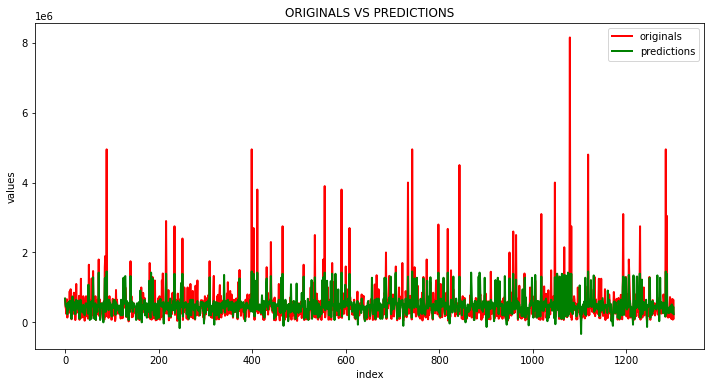

In [37]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

r_2 score : 0.25022258620246085 

CV scores: [0.26031064 0.34630012 0.40226221 0.26202288 0.6359024 ] 

CV scores mean: 0.38135965165101743


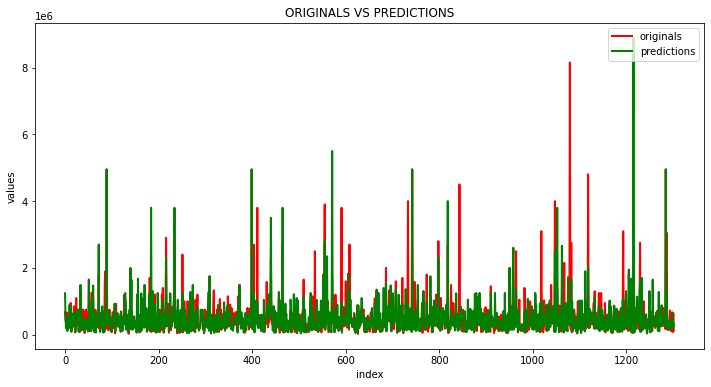

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

r_2 score : 0.5674677312464069 

CV scores: [0.59084084 0.45640573 0.53652679 0.43104848 0.72697081] 

CV scores mean: 0.5483585314436116


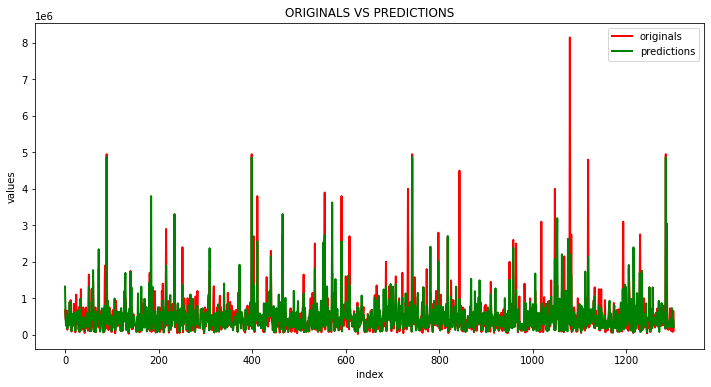

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,X_train,y_train,X_test,y_test)

In [40]:
Model = ["LinearRegression","SGDRegressor","Ridge","Lasso","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.437071,0.429284
1,SGDRegressor,0.436548,0.428195
2,Ridge,0.437017,0.429310
3,Lasso,0.409739,0.408324
4,DecisionTreeRegressor,0.250223,0.381360
5,RandomForestRegressor,0.567468,0.548359
